In [1]:
# 6.4

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

In [2]:
# Data

mu0 = 1.9
t20 = 0.95**2
s20 = 0.01
nu0 = 1

y = np.array([1.64, 1.70, 1.72, 1.74, 1.82, 1.82, 1.82, 1.90, 2.08])
mean_y = np.mean(y)
var_y = np.var(y, ddof=1)
n = len(y)

In [3]:
# Starting Values

S = 1000
PHI = np.zeros(shape=(S, 2))
phi = [mean_y, 1 / var_y]
PHI[0,:] = phi

In [4]:
# Gibbs Sampling

for s in range(1, S):
    # Generate a new theta value from its full conditional 
    mun = (mu0 / t20 + n * mean_y * phi[1]) / (1 / t20 + n * phi[1])
    t2n = 1 / (1 / t20 + n * phi[1])
    phi[0] = norm.rvs(mun, np.sqrt(t2n), 1)
    
    # generate a new 1 / sigma^2 value from its full conditional
    nun = nu0 + n
    s2n = (nu0 * s20 + (n-1) * var_y + n * (mean_y - phi[0])**2) / nun
    phi[1] = gamma.rvs(a=nun/2, scale=2/(s2n*nun), size=1)
    
    PHI[s,:] = phi

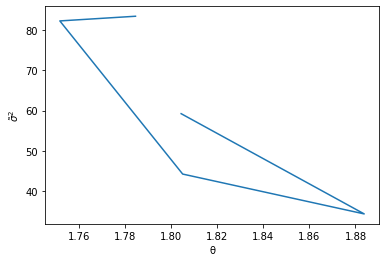

In [5]:
plt.plot(PHI[0:5,0], PHI[0:5,1]);
plt.xlabel('\u03B8');
plt.ylabel(r"$\~\sigma^2$");

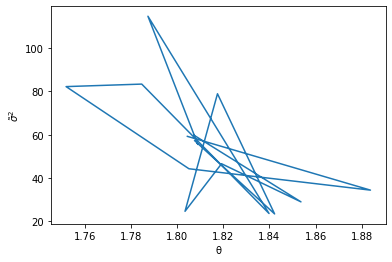

In [6]:
plt.plot(PHI[0:15,0], PHI[0:15,1]);
plt.xlabel('\u03B8');
plt.ylabel(r"$\~\sigma^2$");

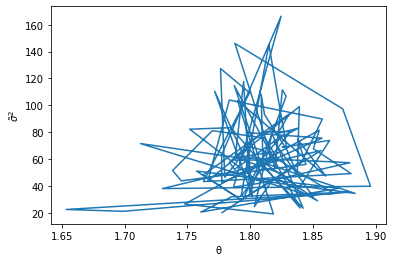

In [7]:
plt.plot(PHI[0:100,0], PHI[0:100,1]);
plt.xlabel('\u03B8');
plt.ylabel(r"$\~\sigma^2$");

In [8]:
print("Confidence Intervals for Population Mean")

print(np.quantile(PHI[:,0], [0.025, 0.5, 0.975]))

print("\nConfidence Interval for Population Precision")
print(np.quantile(PHI[:,1], [0.025, 0.5, 0.975]))

print("\nConfidence Interval for Population Standard Deviation")
print(np.quantile(1 / np.sqrt(PHI[:,1]), [0.025, 0.5, 0.975]))

Confidence Intervals for Population Mean
[1.72092586 1.80511195 1.89043123]

Confidence Interval for Population Precision
[ 19.27431651  57.46325822 128.25337705]

Confidence Interval for Population Standard Deviation
[0.08830102 0.13191827 0.22777736]
